<a href="https://colab.research.google.com/github/KIM14957/AlED-2021A/blob/main/Student_performance_analysis_(Log_vs_SVM_%EB%B9%84%EA%B5%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/student-mat.csv",sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [27]:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
          i=0
        elif (i < 19):
          i=1
        else:
          i=2
        new_age.append(i)
    return new_age

In [28]:
df['age']=age(df['age'])

In [29]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,0,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,0,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,0,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,0,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


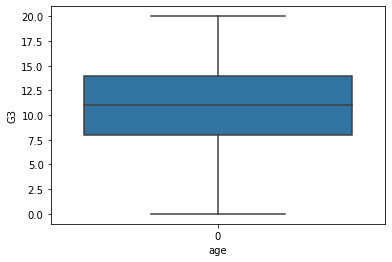

In [31]:
sns.boxplot(x='age',y='G3',data=df)

Students of age (19-20) mostly have a score around 10.0

In [32]:
df['school']=pd.get_dummies(df['school'],drop_first=True)

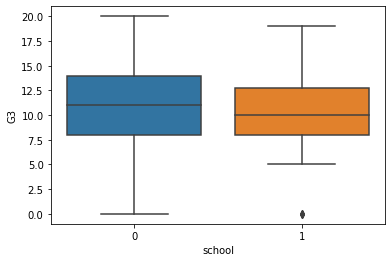

In [34]:
sns.boxplot(x='school',y='G3',data=df)      # 0 = GP and 1 = MS

Students at GP perform better than students at MS

In [35]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

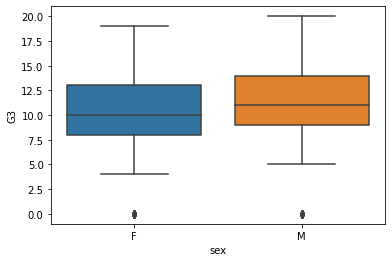

In [36]:
sns.boxplot(x='sex',y='G3',data=df)

Female students have better performance in school than the male students. 
Since the mean score of girls is more than boys and the maximum marks also.(Though there are some outliers)

In [38]:
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)

In [40]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


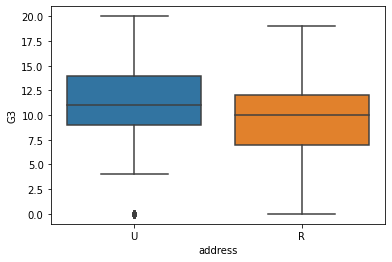

In [41]:
sns.boxplot('address','G3',data=df)

Urban students are distriuted widely in terms of scores,  whereas rural students are clustered between 7 and 17

In [42]:
df['address'] = pd.get_dummies(df['address'],drop_first=True)

In [43]:
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


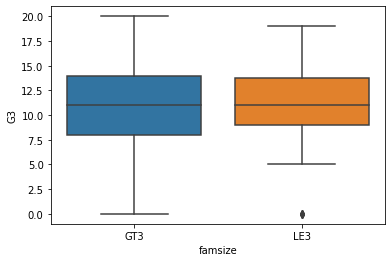

In [44]:
sns.boxplot('famsize','G3',data=df)

Since the family size of the students doesn't tell much about their scores, we'll drop this attribute.

In [45]:
df.drop('famsize',axis=1,inplace=True)

In [46]:
df['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

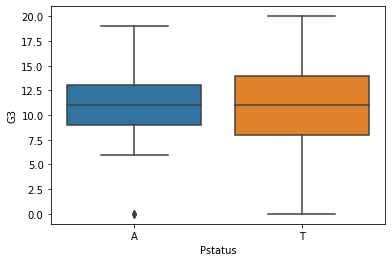

In [47]:
sns.boxplot(x='Pstatus',y='G3',data=df)

Parent's status of living together or apart also affect much the scores, so we'll drop this.

In [48]:
df.drop('Pstatus',axis=1,inplace=True)

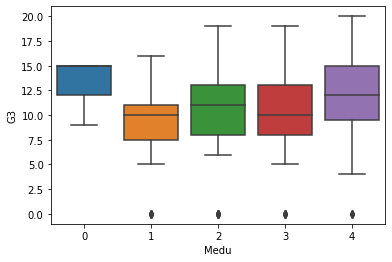

In [49]:
sns.boxplot(x='Medu',y='G3',data=df)

Students whose mother have completed higher education tend to score more than others

In [50]:
df['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

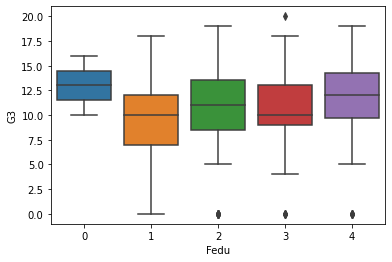

In [51]:
sns.boxplot(x='Fedu',y='G3',data=df)

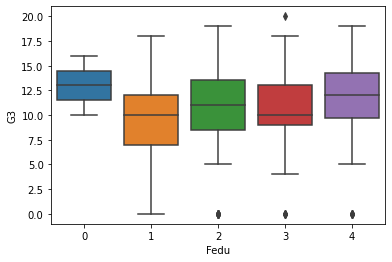

In [52]:
sns.boxplot(x='Fedu',y='G3',data=df)

Students whose fathers have completed higher education have slightly better chance of performing well in exams.

In [53]:
df['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

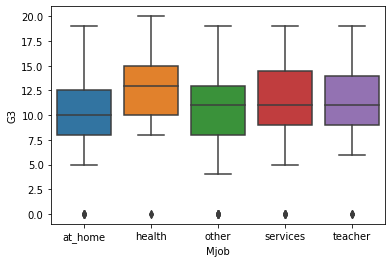

In [54]:
sns.boxplot(x='Mjob',y='G3',data=df)

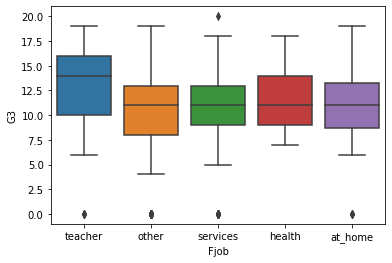

In [55]:
sns.boxplot(x='Fjob',y='G3',data=df)

Students whose parents are teachers ,score better in exams.

I will convert these categories into dummy variables later

In [56]:
df['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


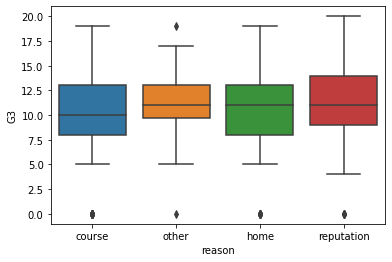

In [57]:
sns.boxplot('reason','G3',data=df)

Students who choose their school by looking at it's reputation ,tend to score better

In [ ]:
df['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

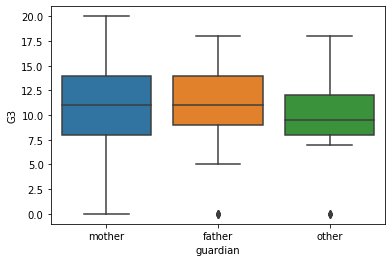

In [58]:
sns.boxplot(x='guardian',y='G3',data=df)

student with guardian's other than father or mother ,scored less than remaining.

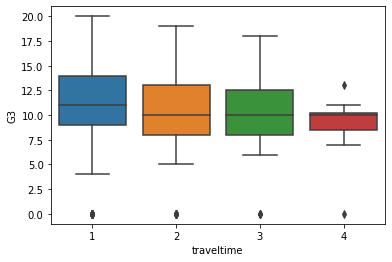

In [59]:
sns.boxplot(x='traveltime',y='G3',data=df)

Travel time to school doesn't affect much

In [60]:
df.drop('traveltime',axis=1,inplace=True)

In [61]:
df['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

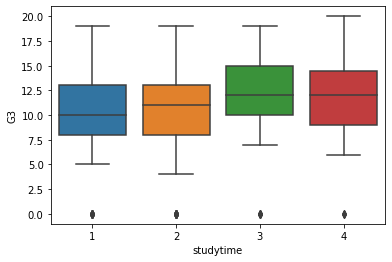

In [62]:
sns.boxplot(x='studytime',y='G3',data=df)

It's pretty clear that if you study for more time,your result will improve.
But we see a little downfall in students who study more than 10 hours , maybe because they are not resting.

In [63]:
df['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

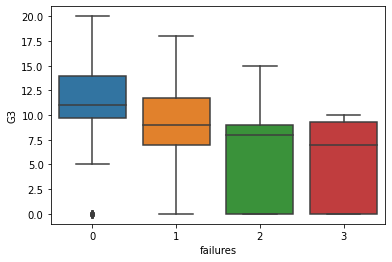

In [64]:
sns.boxplot(x='failures',y='G3',data=df)

Student's who do not have any past failures record score more. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


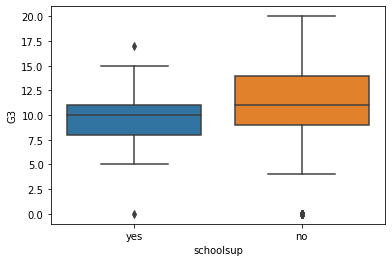

In [65]:
sns.boxplot('schoolsup','G3',data=df)

Student's with school support have much higher chance of passing the exam.

In [66]:
df['schoolsup']=pd.get_dummies(df['schoolsup'],drop_first=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


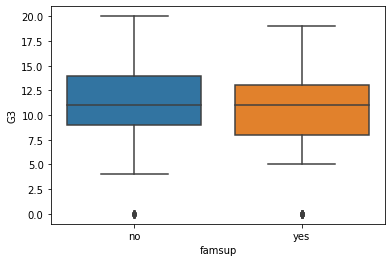

In [67]:
sns.boxplot('famsup','G3',data=df)

Suprisingly there's almost no difference in student's grades whether their family supports them or not in education.

In [68]:
df.drop('famsup',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


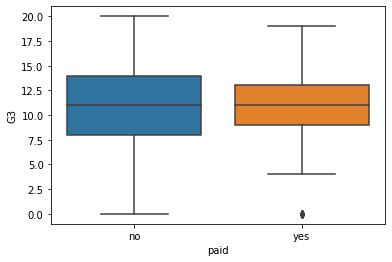

In [69]:
sns.boxplot('paid','G3',data=df)

In [70]:
df['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

Since there are very less student's who are going to paid classes, there's a chance of overfitting our model.
So we'll drop this.

In [71]:
df.drop('paid',axis=1,inplace=True)

In [72]:
df['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


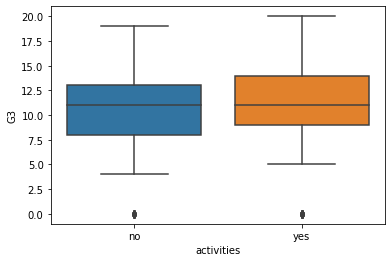

In [73]:
sns.boxplot('activities','G3',data=df)

In [74]:
df.drop('activities',axis=1,inplace=True)

In [75]:
df['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


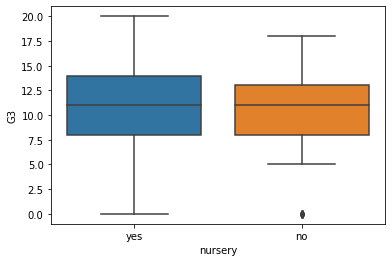

In [76]:
sns.boxplot('nursery','G3',data=df)

Since there's not much difference in scores.
We'll drop this also.

In [77]:
df.drop('nursery',axis=1,inplace=True)

In [78]:
df['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


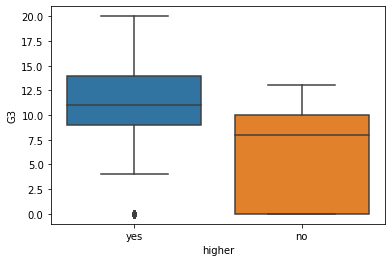

In [79]:
sns.boxplot('higher','G3',data=df)

The students who don't want to take higher studies ,have a poor performance .

In [80]:
df['higher']=pd.get_dummies(df['higher'],drop_first=True)

In [81]:
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [83]:
df['internet']=pd.get_dummies(df['internet'],drop_first=True)

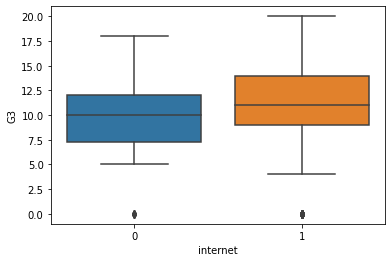

In [84]:
sns.boxplot(x='internet',y='G3',data=df)

Students who do not have internet access at home tend to score average marks. 

In [85]:
df['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


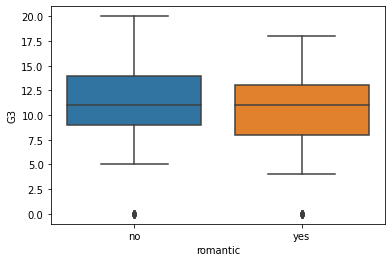

In [86]:
sns.boxplot('romantic','G3',data=df)

We cannot see much difference in student's performance based on whether they are in relationship or not

In [87]:
df.drop('romantic',axis=1,inplace=True)

In [88]:
df['famrel'].value_counts()

4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


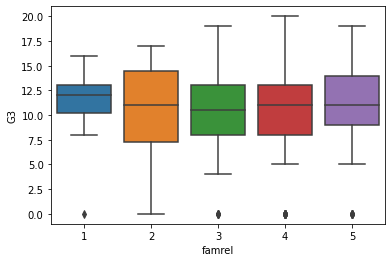

In [89]:
sns.boxplot('famrel','G3',data=df)

Family relations is not affecting the student's performance much.

In [90]:
df.drop('famrel',axis=1,inplace=True)

In [91]:
df['freetime'].value_counts()

3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


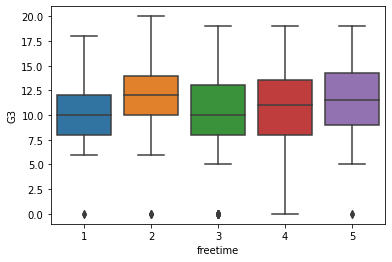

In [92]:
sns.boxplot('freetime','G3',data=df)

In [93]:
df.drop('freetime',axis=1,inplace=True)

In [94]:
df['goout'].value_counts()

3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


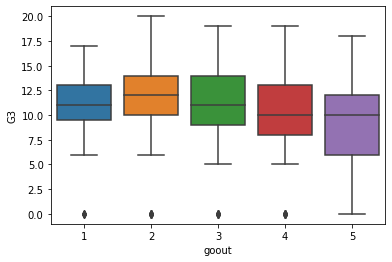

In [95]:
sns.boxplot('goout','G3',data=df)

Going out with friends doesn't affect the performance much , but the student's go out very frequently ,tend to score less marks.

In [96]:
df['Dalc'].value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


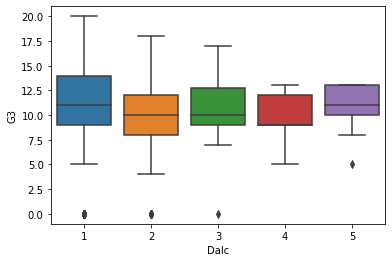

In [97]:
sns.boxplot('Dalc','G3',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


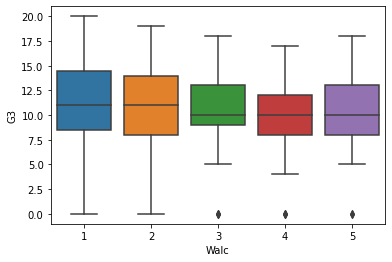

In [98]:
sns.boxplot('Walc','G3',data=df)

Student's who consume alcohol in low quantity ,scores better.

In [99]:
df['health'].value_counts()

5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


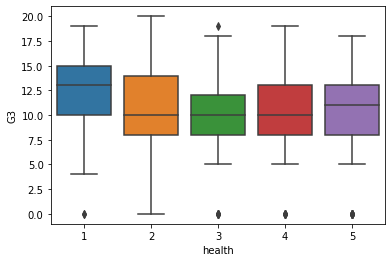

In [100]:
sns.boxplot('health','G3',data=df)

There's not much difference in the scores with respect to student's health

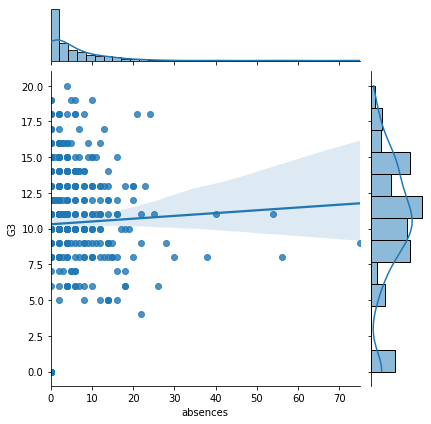

In [101]:
sns.jointplot(x='absences',y='G3',data=df,kind="reg")

In [102]:
def absences(n):
    new=[]
    for i in n:    
        if (i <= 10):
            i=0
        elif(i <= 20):
            i=1
        else:
            i=2
        new.append(i)
    return new

In [103]:
df['absences']=absences(df['absences'])

In [104]:
df['absences'].value_counts()

0    329
1     51
2     15
Name: absences, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


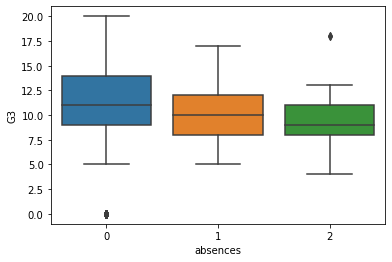

In [105]:
sns.boxplot('absences','G3',data=df)

With increase in absences , the performance of the students decrease

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    uint8 
 1   sex        395 non-null    uint8 
 2   age        395 non-null    int64 
 3   address    395 non-null    uint8 
 4   Medu       395 non-null    int64 
 5   Fedu       395 non-null    int64 
 6   Mjob       395 non-null    object
 7   Fjob       395 non-null    object
 8   reason     395 non-null    object
 9   guardian   395 non-null    object
 10  studytime  395 non-null    int64 
 11  failures   395 non-null    int64 
 12  schoolsup  395 non-null    uint8 
 13  higher     395 non-null    uint8 
 14  internet   395 non-null    uint8 
 15  goout      395 non-null    int64 
 16  Dalc       395 non-null    int64 
 17  Walc       395 non-null    int64 
 18  health     395 non-null    int64 
 19  absences   395 non-null    int64 
 20  G1         395 non-null    int64

In [107]:
df = pd.get_dummies(df,drop_first=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    uint8
 1   sex                395 non-null    uint8
 2   age                395 non-null    int64
 3   address            395 non-null    uint8
 4   Medu               395 non-null    int64
 5   Fedu               395 non-null    int64
 6   studytime          395 non-null    int64
 7   failures           395 non-null    int64
 8   schoolsup          395 non-null    uint8
 9   higher             395 non-null    uint8
 10  internet           395 non-null    uint8
 11  goout              395 non-null    int64
 12  Dalc               395 non-null    int64
 13  Walc               395 non-null    int64
 14  health             395 non-null    int64
 15  absences           395 non-null    int64
 16  G1                 395 non-null    int64
 17  G2              

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
def result(score):
    new=[]
    for i in score:
        if (i<8):
            i=0     #Student fails
        else:
            i=1     #student passes
        new.append(i)
    return new

In [111]:
df['G3']=result(df['G3'])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['G1','G2','G3'],axis=1), df['G3'], test_size=0.33, random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model = LogisticRegression()

In [115]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
model.score(X_test,y_test)

0.816793893129771

In [ ]:
## 여기서부터 SVM 적용

In [119]:
from sklearn.svm import LinearSVC

In [120]:
model=LinearSVC()

In [121]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [122]:
model.score(X_test, y_test)

0.8091603053435115